In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [8]:
df = pd.read_csv('C:/Users/jagad/Downloads/LP-IV-datasets/LP-IV-datasets/ECGdataset(Ass4)/ecg_autoencoder_dataset.csv',header=None)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [11]:
x = df.drop([140], axis=1)
y = df[140]

In [17]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 9.1 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 10.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.0 MB 10.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/44.5 MB 12.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/44.5 MB 10.2 MB/s eta 0:00:04
   ---- ----------------------------------- 5.2/44.5 MB 8.9 MB/s eta 0:00:05
   ------ --------------------------------- 6.8/44.5 MB 8.4 MB/s eta 0:00:05
   ------- -------------------------------- 8.4/44.5 MB 7.9 MB/s eta 0:00:05
   --

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [24]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [31]:
input_dim = x_train.shape[1]

input_layer = layers.Input(shape=(input_dim,))

encoder = layers.Dense(16, activation='relu')(input_layer)
encoder = layers.Dense(8, activation='relu')(encoder)

latent = layers.Dense(4, activation='relu')(encoder)

decoder = layers.Dense(8, activation='relu')(latent)
decoder = layers.Dense(16, activation='relu')(decoder)
decoder = layers.Dense(input_dim, activation='sigmoid')(decoder)


In [35]:
autoencoder = models.Model(
    input_layer,
    decoder)

In [44]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [45]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=32, shuffle='True', validation_data=(x_test,x_test))

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0484 - loss: 0.8353 - val_accuracy: 0.0530 - val_loss: 0.7816
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0445 - loss: 0.7717 - val_accuracy: 0.0620 - val_loss: 0.7808
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0463 - loss: 0.7850 - val_accuracy: 0.0400 - val_loss: 0.7800
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0488 - loss: 0.8124 - val_accuracy: 0.0620 - val_loss: 0.7788
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0455 - loss: 0.7846 - val_accuracy: 0.0520 - val_loss: 0.7781
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0435 - loss: 0.7897 - val_accuracy: 0.0480 - val_loss: 0.7771
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0477 - loss: 0.7874 - val_accuracy: 0.0680 - val_loss: 0.7743
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0459 - loss: 0.8199 - val_accuracy: 0.

In [46]:
loss, accuracy = autoencoder.evaluate(x_test,x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0859 - loss: 0.7635 


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
predictions = autoencoder.predict(x_test)
mse = np.mean(np.square(x_test-predictions), axis=1)
threshold = np.percentile(mse,95)
outliers= mse>threshold
print(confusion_matrix(y_test,outliers))
print(classification_report(y_test,outliers))
      

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[367  35]
 [583  15]]
              precision    recall  f1-score   support

           0       0.39      0.91      0.54       402
           1       0.30      0.03      0.05       598

    accuracy                           0.38      1000
   macro avg       0.34      0.47      0.29      1000
weighted avg       0.33      0.38      0.25      1000



In [50]:
num_anomalies = np.sum(y_test[outliers]==1)
print('Number of Anamolies: ', num_anomalies)

Number of Anamolies:  15


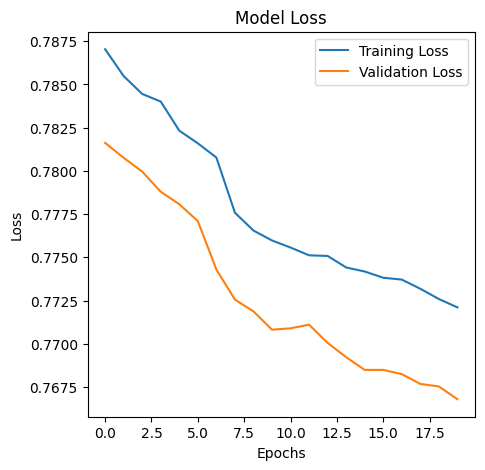

In [51]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

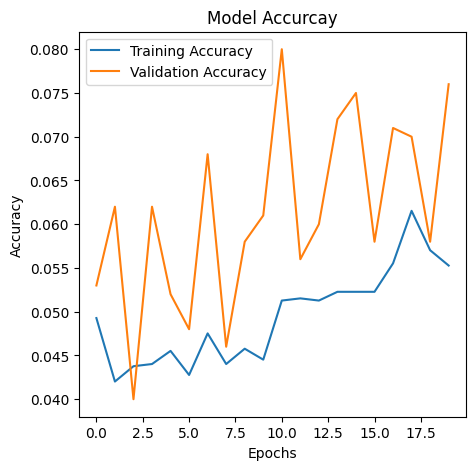

In [52]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accurcay')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()